# plotting with pandas
A few examples of creating common types of plots using `pandas`' built-in support for `matplotlib`.

## Imports
Import the common modules used for pandas-based data analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Line plots
The default plot type in `pandas` is the line plot.

In [30]:
# make a simple time series with dummy data - we will use random values for each day of the year 2021
ts = pd.Series(np.random.randn(365), index=pd.date_range("1/1/2021", periods=365), name='vals')
ts

2021-01-01   -0.569038
2021-01-02    0.515166
2021-01-03   -1.133823
2021-01-04    0.949342
2021-01-05   -1.031897
                ...   
2021-12-27   -1.076417
2021-12-28    0.554269
2021-12-29    1.838827
2021-12-30    0.915744
2021-12-31    0.585085
Freq: D, Name: vals, Length: 365, dtype: float64

Create a simple line plot - the index of the Series will be used as the `x` axis, and the values will be plotting on the `y` axis.

<AxesSubplot:>

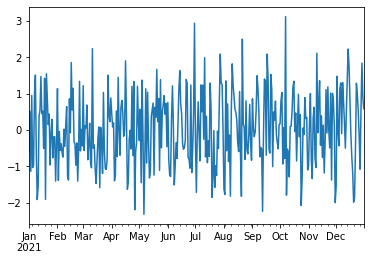

In [31]:
# defaults to line plot
ts.plot()

We can also easily plot the cumulative sum of all prior values at each date.

<AxesSubplot:>

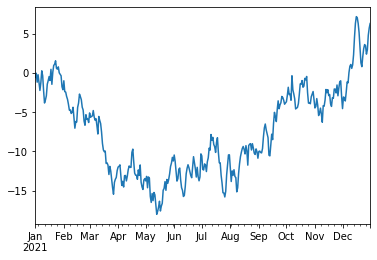

In [32]:
# calculate the cumulative sum of values up to each date
ts = ts.cumsum()
ts.plot()

Let's create a dataframe with this time Series and another one to show how to place two lines on a single plot.

In [5]:
df_ts = pd.DataFrame({
    'first series': ts,
    'second series': np.random.randn(365).cumsum()
    }
)
df_ts.head(3)

,first series,second series
2021-01-01,0.904591,1.086581
2021-01-02,1.114533,-0.335867
2021-01-03,-0.513235,-1.602136


<AxesSubplot:>

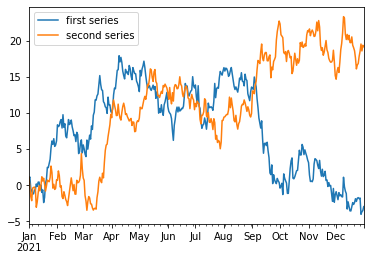

In [6]:
df_ts.plot()

## Bar chart

In [7]:
# create a new index, which places the old index, the dates, into a regular column named 'index'
df = df_ts.reset_index()
df

,index,first series,second series
0,2021-01-01,0.904591,1.086581
1,2021-01-02,1.114533,-0.335867
2,2021-01-03,-0.513235,-1.602136
3,2021-01-04,-0.805014,-2.163271
4,2021-01-05,-1.237495,-0.425295
...,...,...,...
360,2021-12-27,-1.792815,18.524902
361,2021-12-28,-4.051618,19.536694
362,2021-12-29,-3.691766,18.578134
363,2021-12-30,-3.528197,19.365756


In [8]:
# rename the 'index' column to 'date'
df.rename(columns = {"index": "date"}, inplace=True)
df

,date,first series,second series
0,2021-01-01,0.904591,1.086581
1,2021-01-02,1.114533,-0.335867
2,2021-01-03,-0.513235,-1.602136
3,2021-01-04,-0.805014,-2.163271
4,2021-01-05,-1.237495,-0.425295
...,...,...,...
360,2021-12-27,-1.792815,18.524902
361,2021-12-28,-4.051618,19.536694
362,2021-12-29,-3.691766,18.578134
363,2021-12-30,-3.528197,19.365756


In [9]:
# ensure the dates are in a date data type
df["date"] = df["date"].astype("datetime64")

In [10]:
# add a month field
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
df.sample(5)

,date,first series,second series,month
146,2021-05-27,9.657993,13.792404,2021-05
188,2021-07-08,7.862111,9.688463,2021-07
84,2021-03-26,10.714165,5.543571,2021-03
344,2021-12-11,-0.838158,20.907668,2021-12
256,2021-09-14,5.758255,18.056244,2021-09


Group rows by month and calculate the sum of the values in each month

In [11]:
# group rows by month and calculate the sum of the values in each month
g = df.groupby(df['date'].dt.month.rename('month')).agg({'sum'})
g

,first series,second series
,sum,sum
month,,
1,44.040928,-3.872655
2,207.935804,-4.489594
3,301.789829,21.208256
4,451.591202,287.847047
5,407.601238,408.663604
6,335.668272,381.950293
7,360.946661,277.340675
8,447.807821,313.028533


Plot the data in the first series:

<AxesSubplot:xlabel='month', ylabel='first series'>

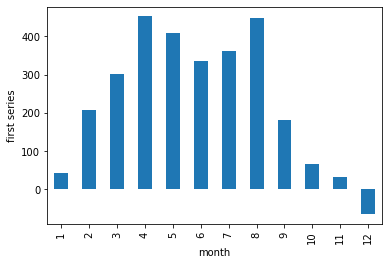

In [12]:
#plot the data in the first series column
g.plot.bar(
    y=['first series'], 
    ylabel='first series', 
    legend=False
) # the index will serve as the x axis, by default

Plot both series in side-by-side bars:

<AxesSubplot:xlabel='month'>

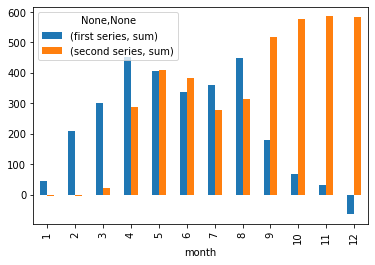

In [13]:
#plot both series in side-by-side bars
g.plot.bar() # the index will serve as the x axis, by default

Plot both series in a stacked bar chart


<AxesSubplot:xlabel='month'>

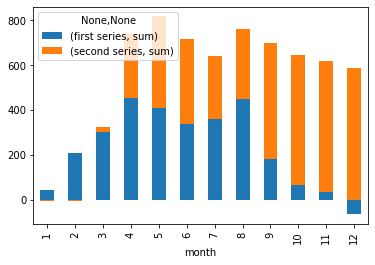

In [14]:
# plot both series in a stacked bar chart
g.plot.bar(stacked=True) # the index will serve as the x axis, by default

## Area chart
Let's show a few details about another chart type - the area chart.

In [15]:
# generate some random data for four columns in a pandas dataframe
df = pd.DataFrame(np.random.rand(10, 4), columns=["foo", "bar", "bum", "baz"])
df.sample(3)

,foo,bar,bum,baz
9,0.894668,0.657813,0.413454,0.336392
8,0.333567,0.166295,0.551618,0.929622
4,0.485514,0.071878,0.060756,0.395372


Plot just a single column:

<AxesSubplot:>

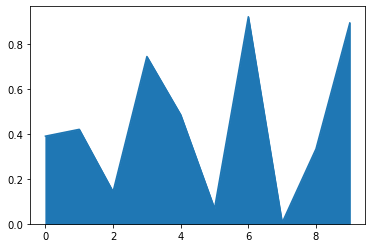

In [16]:
df['foo'].plot.area()

Plot two columns, stacked up on top of each other.

<AxesSubplot:>

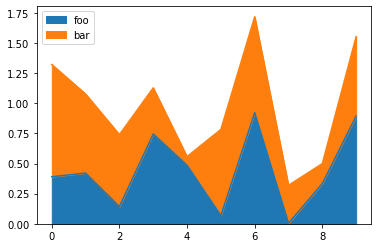

In [17]:
df[ ['foo', 'bar'] ].plot.area()

Plot all columns, stacked up on top of each other.  The default value of the `stacked` argument is `True`, but we include it here anyone just for reference.

<AxesSubplot:xlabel='The label for the x axis', ylabel='The label for the y axis!'>

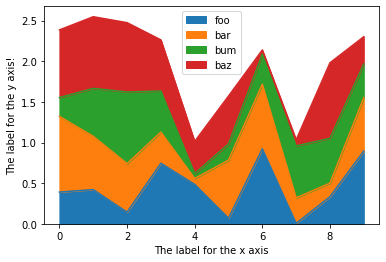

In [18]:
df.plot.area(
    xlabel='The label for the x axis', 
    ylabel='The label for the y axis!', 
    stacked=True
)

## Real data set
We will use the NYC jobs data set, from the NYC Open Data initiative.

In [19]:
# open data about NYC jobs from https://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t
df = pd.read_csv('./data/NYC_Jobs.csv')
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
222,465329,DEPARTMENT OF TRANSPORTATION,Internal,1,Assistant General Counsel,AGENCY ATTORNEY,Non-Competitive-5,30087,02,Legal Affairs,...,NaN,All resumes are to be submitted electronically...,NaN,55 Water St Ny Ny,NaN,New York City Residency is not required for th...,07/29/2021,NaN,07/29/2021,02/15/2022
1566,456060,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,"Laboratory Microbiologist, Bureau of the Publi...",LABORATORY MICROBIOLOGIST,Competitive-1,21513,02,Health,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,12/21/2021,22-APR-2022,02/01/2022,02/15/2022
1298,520252,POLICE DEPARTMENT,Internal,1,Police Administrative Aide,POLICE ADMINISTRATIVE AIDE,Competitive-1,10144,00,Administration & Human Resources,...,This lateral opportunity is open to current Po...,Please Click on Apply Now,0700X1500 MONDAY THROUGH FRIDAY,"138 W 30Th St., N.Y.",NaN,New York City residency is generally required ...,02/11/2022,28-MAR-2022,02/14/2022,02/15/2022


Only include those jobs with an annual salary.

In [20]:
# let's limit to only annual jobs
df = df[ df['Salary Frequency'] == 'Annual' ]
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
1224,458490,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,Child Care Inspection Supervisor,ASSOCIATE PUBLIC HEALTH SANITA,Competitive-1,31220,01,"Health Public Safety, Inspections, & Enforcement",...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,12/21/2021,20-APR-2022,12/21/2021,02/15/2022
2269,519345,LAW DEPARTMENT,Internal,1,"Division Chief, General Litigation Division",ASSISTANT CORPORATION COUNSEL,Exempt-4,3011B,M5,Legal Affairs,...,NaN,Recruitment Contact: Lillian Evans / Director ...,NaN,NaN,NaN,New York City Residency is not required for th...,02/07/2022,08-MAR-2022,02/08/2022,02/15/2022
1061,483730,TAXI & LIMOUSINE COMMISSION,Internal,2,Data Scientist - Policy Analytics,CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,"Technology, Data & Innovation Policy, Research...",...,NaN,"Click, APPLY NOW Current city employees must a...",NaN,"33 Beaver St, New York NY",NaN,New York City residency is generally required ...,09/13/2021,NaN,09/14/2021,02/15/2022


Include only those jobs that pay more than $100,000 annually.

In [21]:
# let's limit to only jobs that could pay more than 80k
df = df[ df['Salary Range To'] > 100000 ]
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
1852,518008,HRA/DEPT OF SOCIAL SERVICES,Internal,1,SENIOR PROJECT LEADER,COMPUTER SPECIALIST (SOFTWARE),Competitive-1,13632,02,"Technology, Data & Innovation Social Services",...,**LOAN FORGIVENESS The federal government pro...,APPLICANTS MUST BE PERMANENT IN THE COMPUTER S...,Normal Business Hours,NaN,NaN,New York City Residency is not required for th...,01/28/2022,18-FEB-2022,01/28/2022,02/15/2022
1653,508809,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, CERTIFICATION",ADMINISTRATIVE STAFF ANALYST (,Competitive-1,10026,M1,Constituent Services & Community Programs,...,NaN,"How to Apply: To apply, please email your re...",NaN,NaN,NaN,New York City residency is generally required ...,12/15/2021,15-MAR-2022,01/05/2022,02/15/2022
1633,517699,DEPT OF HEALTH/MENTAL HYGIENE,External,1,IT Security Risk Analyst,CYBER SECURITY ANALYST,Competitive-1,13633,02,"Health Technology, Data & Innovation",...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York Residency is not required for this ti...,01/27/2022,27-MAY-2022,01/27/2022,02/15/2022


Limit our dataframe to include only a few columns of interest.

In [22]:
# let's limit the columns we want
df = df[ ['Agency', '# Of Positions', 'Salary Range To'] ]
df

,Agency,# Of Positions,Salary Range To
14,DEPT OF ENVIRONMENT PROTECTION,1,122168.0
15,DEPARTMENT OF CORRECTION,1,145000.0
18,DEPARTMENT OF CORRECTION,1,150000.0
19,FINANCIAL INFO SVCS AGENCY,1,120000.0
24,POLICE DEPARTMENT,1,178873.0
...,...,...,...
2807,DEPT OF ENVIRONMENT PROTECTION,1,161534.0
2815,DEPARTMENT OF TRANSPORTATION,1,122168.0
2816,TAXI & LIMOUSINE COMMISSION,1,120000.0
2817,DEPARTMENT FOR THE AGING,1,120000.0


Let's make a bar chart of the salary range to values for each agency

<AxesSubplot:xlabel='Agency', ylabel='Average Top Salary ($)'>

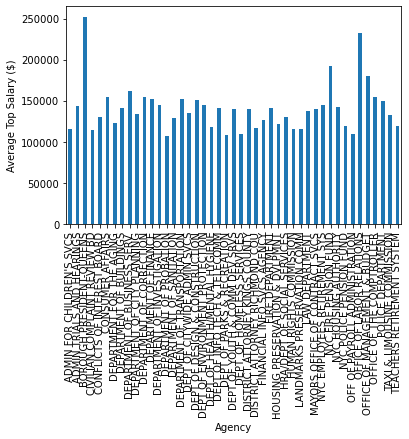

In [23]:
# let's quickly peek at a bar chart of the average salary range to values for each agency
df_to_plot = df[ ['Agency', 'Salary Range To'] ].groupby(by=['Agency']).aggregate({'mean'})
df_to_plot.plot.bar(ylabel='Average Top Salary ($)', legend=False)

Group together all the jobs within the same agency, and add up the number of positions in each agency.

In [24]:
# group jobs at each agency and calculate the sum of # of jobs at each agency
g = df.groupby(df['Agency']).agg({'sum'})
g.head(10)

,# Of Positions,Salary Range To
,sum,sum
Agency,,
ADMIN FOR CHILDREN'S SVCS,9,575461.0
ADMIN TRIALS AND HEARINGS,52,574000.0
BOROUGH PRESIDENT-QUEENS,4,1008660.0
CIVILIAN COMPLAINT REVIEW BD,7,570237.0
CONFLICTS OF INTEREST BOARD,2,260000.0
CONSUMER AFFAIRS,4,620000.0
DEPARTMENT FOR THE AGING,4,490000.0
DEPARTMENT OF BUILDINGS,2,282000.0


A horizontal bar chart that shows the number of open positions within each agency of the NYC government:

<AxesSubplot:ylabel='Agency'>

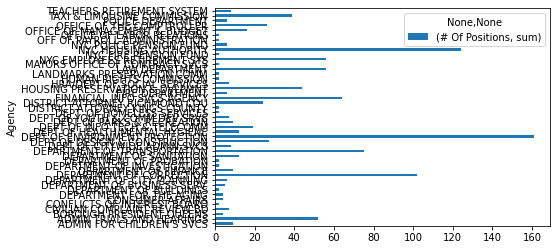

In [25]:
# plot the jobs at each agency
g.plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

A horizontal bar chart that shows the bottom 10 agencies, by number of open positions:
- first we sort the rows by number of positions, in ascending order
- then we grab the first 10 rows, reverse their order, and plot them.

<AxesSubplot:ylabel='Agency'>

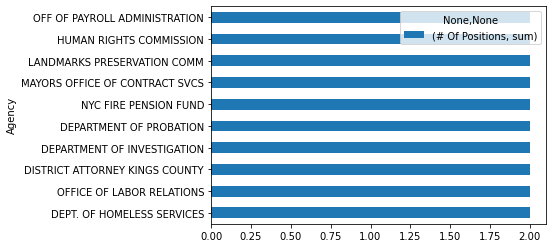

In [26]:
# that is a lot of agencies!
# perhaps limit to just the first few agencies!
g1 = g.sort_values(by=('# Of Positions', 'sum'), ascending=True)
g1[:10][::-1].plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

A horizontal bar chart that shows the top 10 agencies, by number of open positions:
- first we sort the rows by number of positions, in descending order
- then we grab the first 10 rows, reverse their order, and plot them.

<AxesSubplot:ylabel='Agency'>

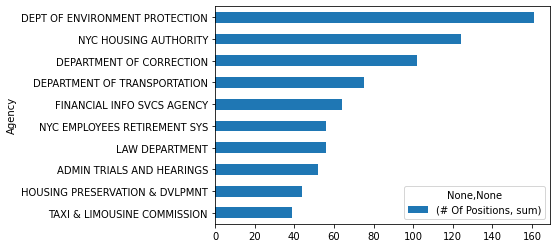

In [27]:
# plot the top agencies by number of positions
g2 = g.sort_values( ('# Of Positions', 'sum'), ascending=False )
g2[ : 10][::-1].plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

A vertical bar chart that shows the bottom 10 agencies, by number of open positions:

<AxesSubplot:xlabel='Agency'>

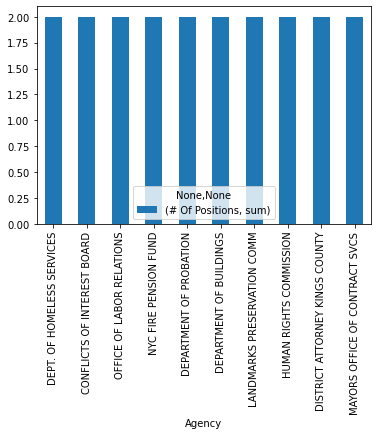

In [28]:
# plot the bottom agencies by number of positions
g2[-10 : ].plot.bar(y=['# Of Positions']) # the index will serve as the x axis, by default

## Pie charts

A pie chart that shows the proportion of available jobs that belong to each agency of NYC government.

<AxesSubplot:ylabel='sum'>

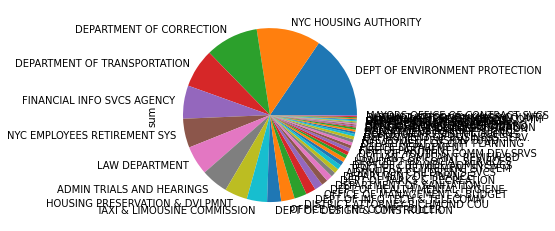

In [29]:
# pie chart of the top 10 agencies, by number of positions over 100k
g2.plot.pie(y='# Of Positions', legend=False)